# **Data Loading and Initial Cleaning**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Initial Cleaning ---
print("--- Loading and Cleaning Data ---")
# Load the dataset
# Ensure 'DataAnalyst.csv' is in the same directory or provide the full path
df = pd.read_csv('/content/DataAnalyst.csv')

--- Loading and Cleaning Data ---


# **Data Cleaning**

In [9]:
# --- Data Cleaning ---

# 1.1 Clean 'Salary Estimate' column
# Remove rows where salary is '-1'
df = df[df['Salary Estimate'] != '-1']

# Function to parse salary string
def parse_salary(salary_str):
    salary_str = salary_str.split('(')[0]  # Remove '(Glassdoor est.)'
    salary_str = salary_str.replace('K', '').replace('$', '')
    min_sal, max_sal = map(int, salary_str.split('-'))
    return min_sal * 1000, max_sal * 1000

# Apply the function to create new salary columns
df[['Min Salary', 'Max Salary']] = df['Salary Estimate'].apply(lambda x: pd.Series(parse_salary(x)))
df['Average Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

# 1.4 Replace '-1' values with NaN
df.replace(-1, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)


# 1.2 Clean 'Company Name'
# Convert to string to handle NaN values before splitting
df['Company Name'] = df['Company Name'].astype(str).apply(lambda x: x.split('\n')[0])

# 1.3 Clean Location and Headquarters
df['State'] = df['Location'].apply(lambda x: x.split(', ')[-1])

# **Feature Engineering**

In [10]:
# --- 2. Feature Engineering (Extracting Skills) ---
print("\n--- Extracting Key Skills from Job Descriptions ---")
# Create columns for popular skills
df['Python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['SQL'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['Excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['Tableau'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df['Power BI'] = df['Job Description'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)


--- Extracting Key Skills from Job Descriptions ---


# **Exploratory Data Analysis (EDA)**


--- Performing Exploratory Data Analysis ---


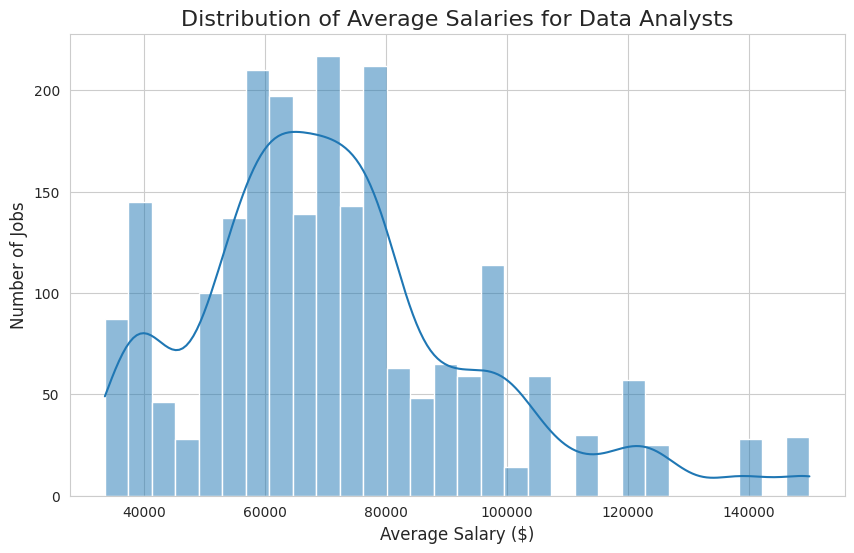

/tmp/ipython-input-2558629411.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')


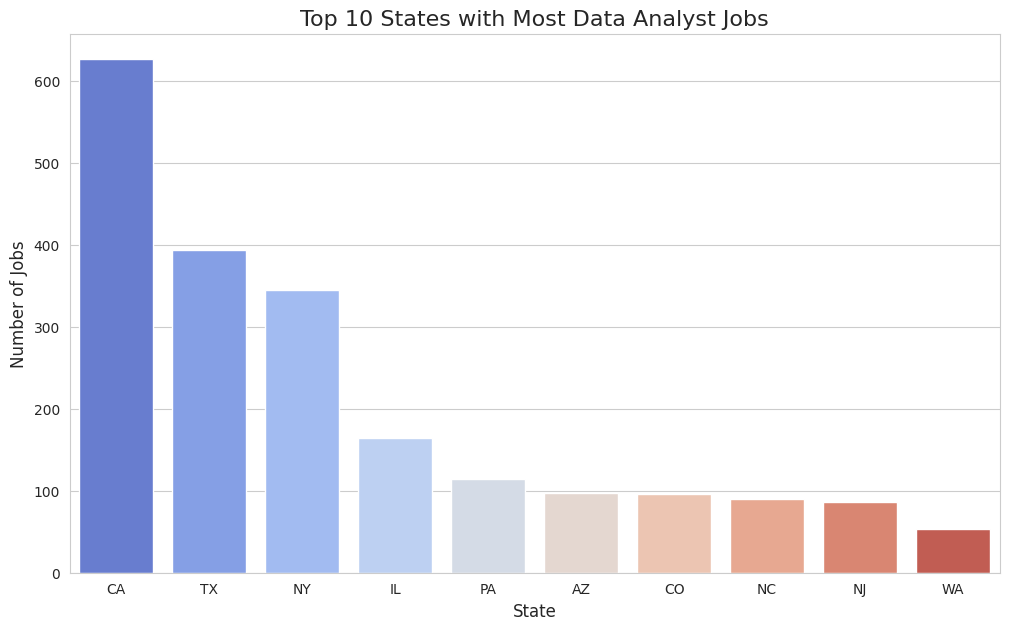

/tmp/ipython-input-2558629411.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors_salary.values, y=top_sectors_salary.index, palette='viridis')


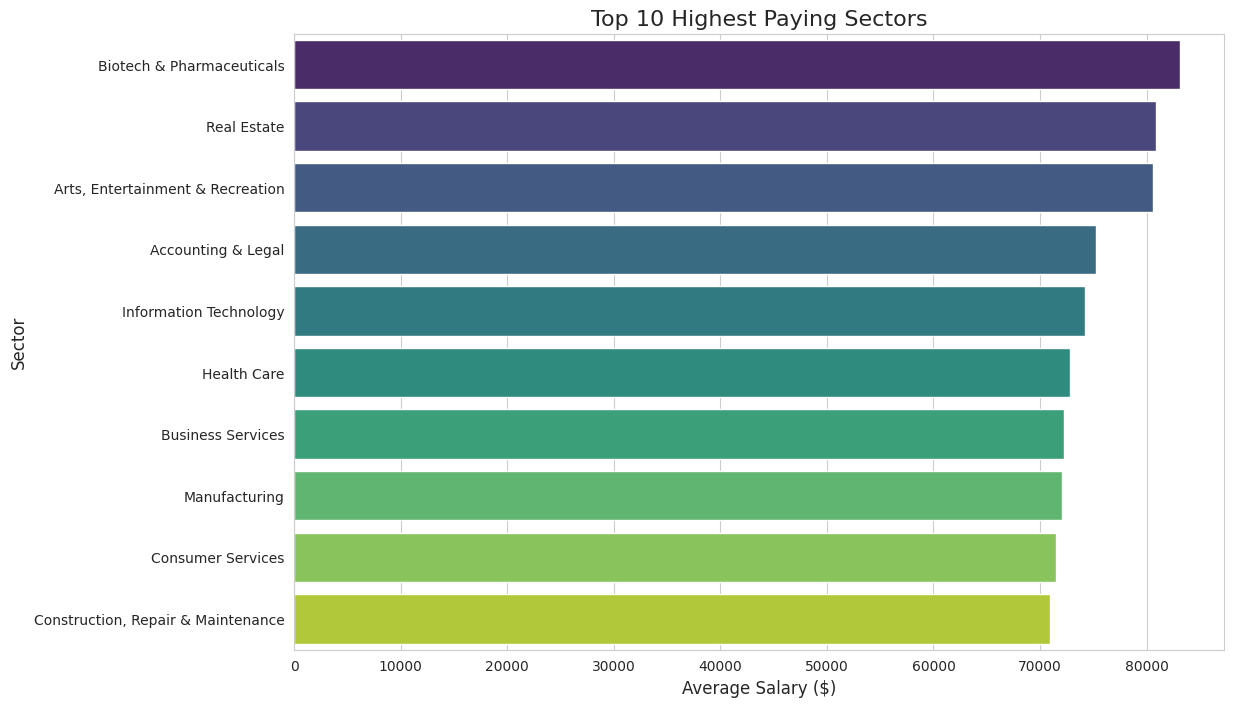

/tmp/ipython-input-2558629411.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_counts.index, y=skill_counts.values, palette='plasma')


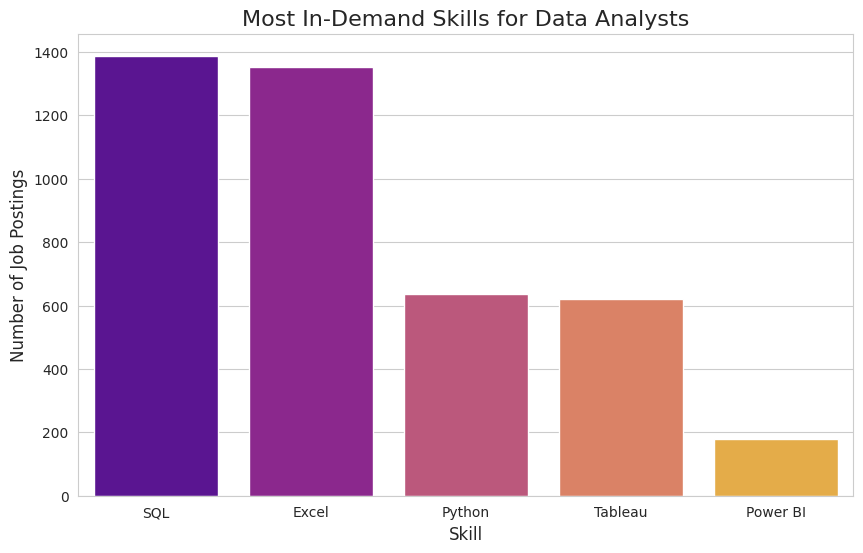


--- Analysis Complete ---


In [11]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\n--- Performing Exploratory Data Analysis ---")
sns.set_style("whitegrid")

# Plot 1: Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Average Salary'], bins=30, kde=True)
plt.title('Distribution of Average Salaries for Data Analysts', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.show()

# Plot 2: Top 10 States for Data Analyst Jobs
plt.figure(figsize=(12, 7))
top_states = df['State'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='coolwarm')
plt.title('Top 10 States with Most Data Analyst Jobs', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.show()

# Plot 3: Top 10 Highest Paying Sectors
plt.figure(figsize=(12, 8))
# Group by sector, calculate mean salary, and sort
top_sectors_salary = df.groupby('Sector')['Average Salary'].mean().sort_values(ascending=False).nlargest(10)
sns.barplot(x=top_sectors_salary.values, y=top_sectors_salary.index, palette='viridis')
plt.title('Top 10 Highest Paying Sectors', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Sector', fontsize=12)
plt.show()

# Plot 4: Most In-Demand Skills
skills = ['Python', 'SQL', 'Excel', 'Tableau', 'Power BI']
skill_counts = df[skills].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=skill_counts.index, y=skill_counts.values, palette='plasma')
plt.title('Most In-Demand Skills for Data Analysts', fontsize=16)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.show()


print("\n--- Analysis Complete ---")